# Задания

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('credit_scoring.csv')
df.head(5)

,Имя,Возраст,Месячный доход
0,Николай,39,5600
1,Ольга,43,12000
2,Митя,17,15000
3,Вика,19,9600
4,Петр,21,20000


## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv). 
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [3]:
clients1 = df['Имя'][(df['Возраст'] >18) & (df['Месячный доход'] > 10000)]
clients1.reset_index(drop=True , inplace=True )
print('Клиенты, которым должны одобрить заявку на кредит: ', end ='')
for i in range(0, len(clients1)):
  print(clients1.iloc[i], end = ' ')

Клиенты, которым должны одобрить заявку на кредит: Ольга Петр 

## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. 
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен 
показывать вид ириса. Обязательно добавь легенду по маркерам. 

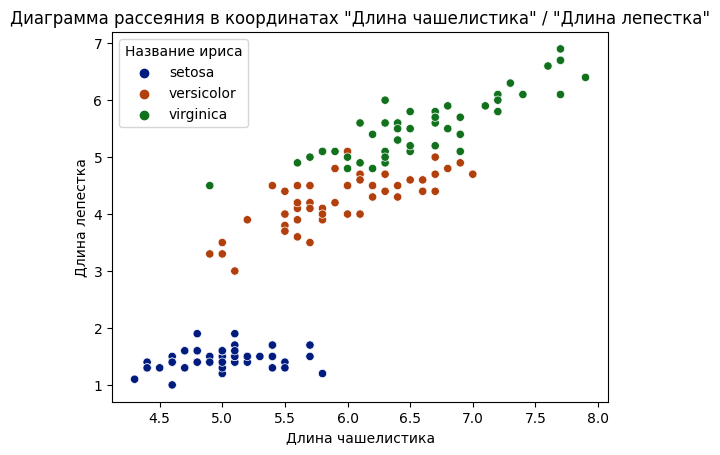

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
# импортируем набор данных из модуля datasets библиотеки sklearn
iris = load_iris()
# создаем датафрейм, берем данные из iris.data и название столбцов из iris.feature_names
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

iris_df['target'] = iris.target
iris_df['Название ириса'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.rename(columns = {'sepal length (cm)':'Длина чашелистика','petal length (cm)':'Длина лепестка'}, inplace = True )
sns.scatterplot(x = iris_df['Длина чашелистика'],
                y = iris_df['Длина лепестка'],
                hue= iris_df['Название ириса'], palette = 'dark')
plt.title('Диаграмма рассеяния в координатах "Длина чашелистика" / "Длина лепестка"')
plt.show()

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = iris_df['target']
X = iris_df.drop(['target','sepal width (cm)','petal width (cm)','Название ириса'],axis=1)
print(X)

#Получение обучающей и тестовой выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,shuffle = True,random_state=42)
#Создание модели
m_d = DecisionTreeClassifier(max_depth=2)
#Обучение модели
m_d.fit(X_train, Y_train)
#Предсказание
Y_pred = m_d.predict(X_test)
#Точность
accuracy = accuracy_score(Y_test, Y_pred)
print(f'accuracy = {round(accuracy*1,3)}')

     Длина чашелистика  Длина лепестка
0                  5.1             1.4
1                  4.9             1.4
2                  4.7             1.3
3                  4.6             1.5
4                  5.0             1.4
..                 ...             ...
145                6.7             5.2
146                6.3             5.0
147                6.5             5.2
148                6.2             5.4
149                5.9             5.1

[150 rows x 2 columns]
accuracy = 0.967


## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
Также отрисуй дерево, которое получилось в результате обучения модели. 
Напиши сколько листов у получившегося дерева.

c:\users\hellen\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\users\hellen\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\users\hellen\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


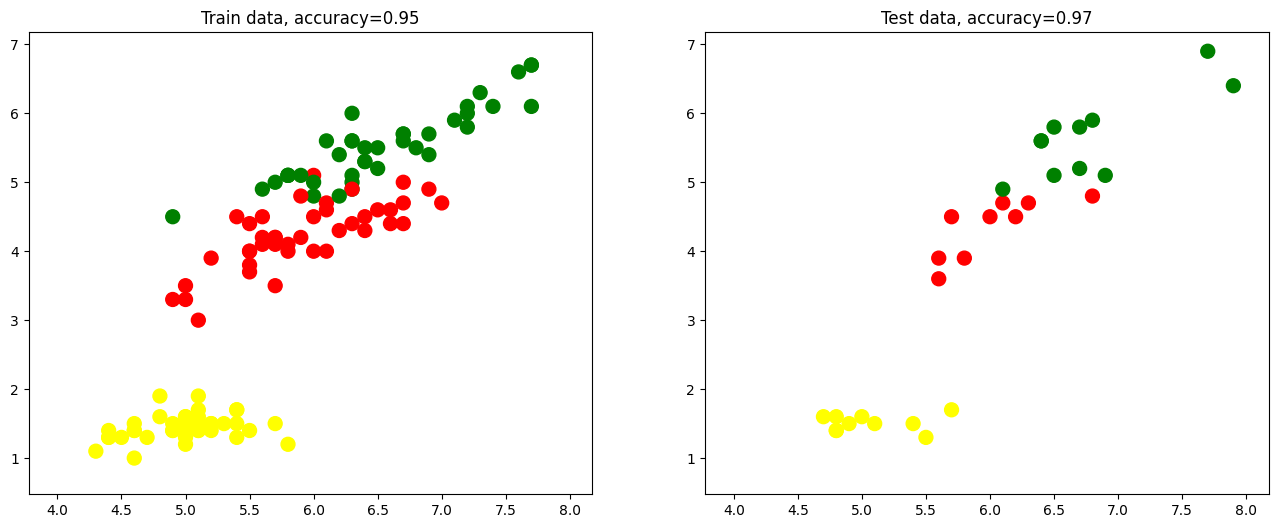

In [6]:
from matplotlib.colors import ListedColormap

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(
        model, train_data, train_labels, test_data, test_labels,
        colors=ListedColormap(['yellow', 'red', 'green']),
        light_colors=ListedColormap(['white', 'white', 'white'])
):
    train_data = train_data.to_numpy()
    test_data = test_data.to_numpy()
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(accuracy_score(train_labels, model.predict(train_data))))

    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(accuracy_score(test_labels, model.predict(test_data))))

m_d = DecisionTreeClassifier(random_state = 42, max_depth = 2)
m_d.fit(X_train, Y_train)
plot_decision_surface(m_d, X_train, Y_train, X_test, Y_test)

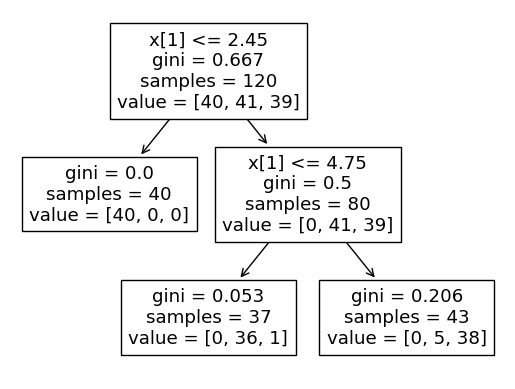

3 листа у полученного дерева. 


In [7]:
from sklearn import tree
tree.plot_tree(m_d, filled=False)
plt.show()
print (f'{m_d.get_n_leaves()} листа у полученного дерева. ')

## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 1000 отсчетов. 
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

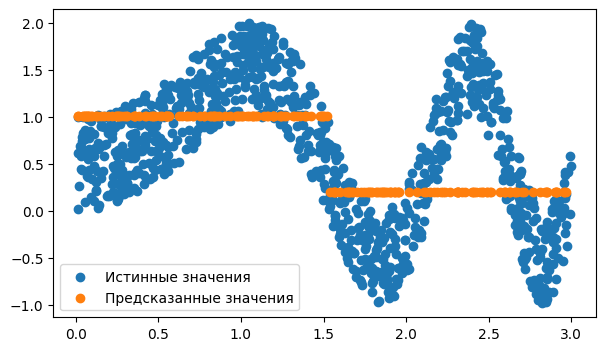

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y

x, y = generate_sin(1000)

#Разделение на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Создание модели
m_d = DecisionTreeRegressor(max_depth=1)
#Обучение модели
m_d.fit(X_train, y_train)
#Прогноз
ypred = m_d.predict(X_test)
#Визуализация
plt.figure(figsize=(7,4))
plt.scatter(x,y, label = 'Истинные значения', linewidths=1)
plt.scatter(X_test,ypred, label = 'Предсказанные значения', linewidths=1)
plt.legend()
plt.show()

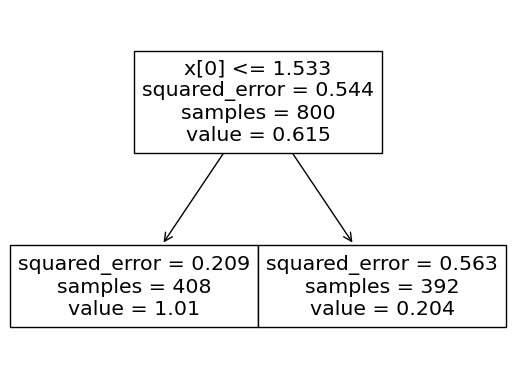

In [9]:
tree.plot_tree(m_d, filled=False)
plt.show()

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее. 

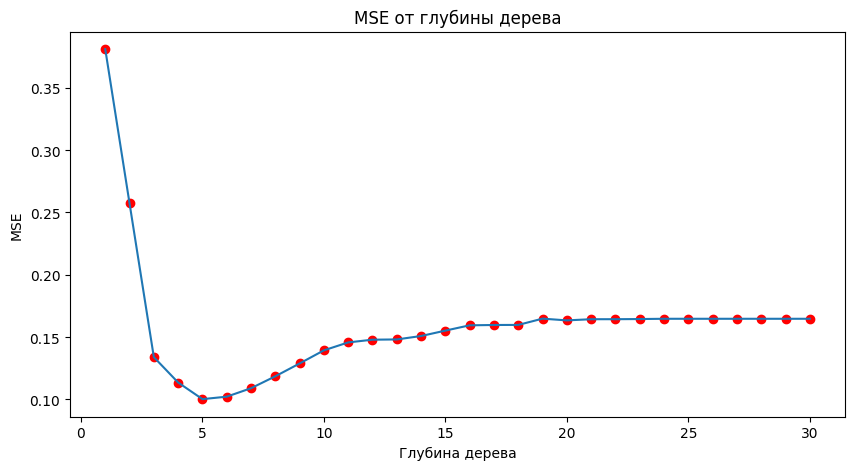

 Глубина дерева  5 с наименьшим  MSE: 0.10029760373699702 


In [10]:
from sklearn.metrics import mean_squared_error

mse=[]
d_t =[]

for i in range (1,31):
  #Создание модели
    m_d = DecisionTreeRegressor(max_depth=i)
  #Обучение модели
    m_d.fit(X_train, y_train)
  #Прогноз
    ypred = m_d.predict(X_test)
    m_se = mean_squared_error(y_test,ypred)
  #Сохранение результатов
    mse.append(m_se)
    d_t.append(i)
    #print (i,m_se)
#Визуализация
plt.figure(figsize = (10,5))
plt.plot(d_t,mse)
plt.scatter(d_t,mse , marker='o', color='red')
plt.title("MSE от глубины дерева")
plt.ylabel("MSE")
plt.xlabel("Глубина дерева")
plt.show()
print (f' Глубина дерева  {mse.index(min(mse))+1 } с наименьшим  MSE: {min(mse)} ')


## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE 
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
Напиши количество деревьев, при котором качество модели наилучшее. 

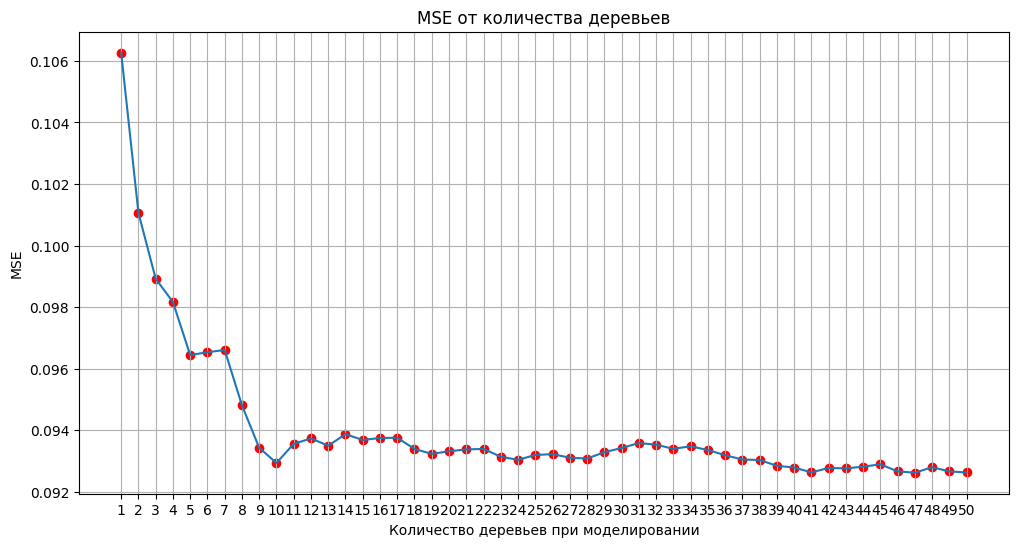

 47 - количество деревьев решений, при котором качество модели наилучшее. (MSE = 0.09262002596469604)


In [11]:
from sklearn.ensemble import BaggingRegressor
#Создание модели
m_d = DecisionTreeRegressor(max_depth=5)
mse =[]
d_t =[]

for i in range (1,51):
    #Упаковка i деревьев (создание ансамбля из i деревьев)
    b_m_d = BaggingRegressor(estimator = m_d, n_estimators=i,bootstrap=True, random_state=42)
    #Обучение
    b_m_d.fit(X_train, y_train.ravel())
    #Прогноз
    ypred = b_m_d.predict(X_test)
    #Сохранение результатов прогноза
    m_se = mean_squared_error(y_test,ypred)
    mse.append(m_se)
    d_t.append(i)
#Визуализация
plt.figure(figsize = (12,6))
plt.plot(d_t,mse)
plt.scatter(d_t,mse , marker='o', color='red')
plt.title("MSE от количества деревьев")
plt.ylabel("MSE")
plt.xlabel("Количество деревьев при моделировании")

plt.xticks(range(1,len(d_t)+1))
plt.grid()
plt.show()

print (f' {mse.index(min(mse))+1} - количество деревьев решений, при котором качество модели наилучшее. (MSE = {min(mse)})')

## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5, 
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [12]:
from sklearn.ensemble import RandomForestRegressor

#Создание модели
r_f = RandomForestRegressor (max_depth=5, n_estimators=100, max_features=1, random_state=42)
#Обучение
r_f.fit(X_train, y_train.ravel())
#Прогноз
y_pred = r_f.predict(X_test)
mse = mean_squared_error(y_test,y_pred).round(3)
print(f'MSE на тестовой выборке = ',mse)

MSE на тестовой выборке =  0.091
